<a href="https://colab.research.google.com/github/jcardonamde/Predicting_Diabetes_MLmodel/blob/main/Predicting_Diabetes_MLmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetes**

**Requisitos:**

Tu tarea consiste en predecir de forma diagnóstica si un paciente tiene diabetes o no, basándote en determinadas medidas de diagnóstico incluidas en el conjunto de datos.

**Asegúrate de:**

* Limpiar los datos.
* Explorar los datos (debes incluir al menos 2 visualizaciones)
* Crear un modelo para predecir si un paciente tiene (1) o no tiene (0) diabetes

Debes construir el modelo más preciso que puedas. Asegúrate de validar tu modelo utilizando un conjunto de prueba y entrenamiento. Debes poder justificar por qué elegiste el modelo que utilizaste. Esto puede implicar probar varios modelos y determinar el mejor, o ser capaz de explicar y justificar racionalmente tu elección.

## **Diccionario de datos:**

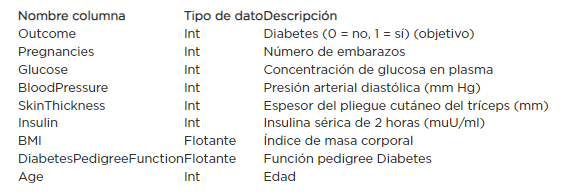

## **Requisito de envío:**

Todo tu código utilizado para limpiar, hacer el análisis exploratorio y modelar los datos.

**Notas:**

* Los datos están disponibles para descargar aquí. El conjunto de datos original es de Kaggle.
* Para evitar que otros estudiantes copien tu trabajo, asegúrate de que el código no esté guardado en GitHub.
* Para minimizar el descuento de puntaje, asegúrate de cargar los requisitos completos.
* Si tienes problemas para cargar archivos en la aplicación del examen, NO desbloquees otro examen. Por favor, envía el archivo por correo electrónico a tu instructor.
* Puedes utilizar cualquier recurso que tengas disponible (notas de clase, Google, Stackoverflow, etc.) - PERO DEBES CITAR CUALQUIER FUENTE QUE UTILICES.
* Puedes citar fuentes en forma de comentario de código o como una celda de texto con enlaces a cualquier recurso que hayas utilizado. El no citar las fuentes se considerará plagio y resultará en la reprobación del examen.
* NO puedes obtener o recibir ayuda de ninguna otra persona para este código. Esto incluye compañeros de clase, exalumnos, tu instructor, etc. La colaboración con otra persona en este examen se considerará plagio y resultará en la reprobación del examen.



---



##⭐*Preparar/limpiar los datos para fines de análisis exploratorio*

In [1]:
# Importamos las bibliotecas requeridas para el manejo de nuestros datos y el modelado
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')

In [2]:
# Importamos el data set y lo visualizamos en un DataFrame
filename = ('/content/drive/MyDrive/Colab Notebooks/Codificación de Dojo/Semana06/Examen Cinturon/diabetes.csv')
df = pd.read_csv(filename)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Verifico la nomenclatura de las columnas en caso de poseer algún espaciado y que no vaya a influir en errores de mis próximas validaciones
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
# Inicialmente identifico la forma del dataset
df.shape

(768, 9)

Con lo anterior puedo entender que este data set maneja 768 columnas y 9 filas.Posteriormente, voy a identificar los tipos de datos que componen cada columna al igual si se tienen valores faltantes.

In [5]:
# Revisamos el número y tipo de datos por Columna, al igual que datos faltantes que se tienen
print(df.info(), '\n')
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                    

Podemos ver que en nuestro data set cada columna tiene valores completos. No se tienen datos faltantes y que las columnas de datos en su totalidad son de categoría numérica. 

In [6]:
# Identificamos cual es la cantidad de datos duplicados y en caso de existir poderla depurar
df.duplicated()
df.duplicated().sum()

0

Luego del uso de los anteriores métodos vemos que está perfecto, ya que al momento no contamos con datos duplicados por depurar. Ahora vamos a identificar como esta compuesto el data set para validar si hay datos con inconsistencias que debamos abordar y corregir.

In [7]:
# Inicialmente, examino el número de valores únicos entre las columnas con las cuales estamos trabajando
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

Como veo que hay diferentes tipos de valores únicos por columna y entendiendo que toda la composición del data set es de categoría numérica, me gustaría visualizar la descripción estadística que está relacionada con los datos del data set.

In [8]:
# Mostramos con la función describe todas las estadísticas de las columnas, para obtener valores mínimos, máximos, media, conteo, entre otros que componen el data set
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


De lo anterior noto algo muy particular y es que en el caso de las columnas Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, y Outcome. Tienen un valor mínimo de 0.

Lo cual no tendría mucho sentido, a excepción de la columna Outcome que es nuestro objetivo y de la cual conocemos gracias a nuestro diccionario de datos, que esta maneja solo dos tipos de valores 1 o 0 para definir si una persona tenga diabetes o no.

El resto de columnas anteriormente mencionadas no debería tener estos valores en 0, pues no es posible que por ejemplo una persona tena una presión sanguínea de cero o una medición de glucosa en cero.

In [9]:
# Reviso la composición de valores por dato único en la columna Outcome
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Este resultado confirma mi teoría inicial de que para la columna Outcome no se tiene problema en tener un valor mínimo de 0.

Procedo a seguir evaluando las demás columnas.

In [10]:
# Generamos un filtro para obtener un acercamiento más claro de cuantas personas a cuantas personas están en embarazo
Pregnancies_filter = df.loc[:, 'Pregnancies'] == 0
Pregnancies_filter.value_counts()

False    657
True     111
Name: Pregnancies, dtype: int64

In [11]:
# Reviso la composición de valores por dato único en la columna Pregnancies
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

Lo anterior tiene sentido y me lleva a concluir que no todas las personas necesariamente hayan tenido que tener embarazos o que lo hayan estado en el momento de la prueba. 

**Por lo que decido no generar ningún tipo de reemplazamiento o imputación a esta columna.**


---



In [12]:
# Generamos un filtro para obtener un acercamiento más claro de cuantas personas tienen la Glucosa en 0
Glucose_filter = df.loc[:, 'Glucose'] == 0
Glucose_filter.value_counts()

False    763
True       5
Name: Glucose, dtype: int64

In [13]:
# Visualizamos en un DataFrame estos 5 valores relacionados al filtro de la Columna
df[Glucose_filter]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


Revisando los valores en comparación a las demás columnas relacionados a estas 5 filas. Siento que no hay una relación clara, por ejemplo, una persona no podría tener un valor de Glucosa en 0 sabiendo que tiene Diabetes (Outcome = 1). También tomo como referencia lo que leí en el siguiente artículo [Ver](https://medlineplus.gov/spanish/ency/article/001214.htm#:~:text=Se%20diagnostica%20diabetes%20si%20el,para%20la%20diabetes%20tipo%202.) (**Fuente:** MedLinePlus.gov).





Con base a lo anterior procedere a generar una imputación de los valores de manera directa mediante el promedio de la columna.

In [14]:
# Reemplazo valores 0 con el valor promedio de la Columna
Glucose_col = df['Glucose']
Glucose_col.replace(to_replace = 0, value = Glucose_col.mean(), inplace=True)

In [15]:
# Verifico status de valores iguales a cero nuevamente por medio del filtro
Glucose_filter = df.loc[:, 'Glucose'] == 0
Glucose_filter.value_counts()

False    768
Name: Glucose, dtype: int64

Ya la columna Glucose quedo procesada satisfactoriamente con valores númericos sin alterar la categoria de la misma.

---



In [16]:
# Generamos un filtro para obtener un acercamiento más claro de cuantas personas tienen Presión en la Sangre de 0
BloodPressure_filter = df.loc[:, 'BloodPressure'] == 0
BloodPressure_filter.value_counts()

False    733
True      35
Name: BloodPressure, dtype: int64

In [17]:
# Revisamos los valores únicos por datos de la columna
df['BloodPressure'].value_counts()

70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64

La anterior revisión me permite definir que aunque hayan personas con presión arterial baja no es normal que su valor sea cero. Pues esto indicaria que la persona no tendria pulso y no estuviese viva.

Lo anterior esta fundamentado en las siguientes fuentes informativas:

* La presión arterial alta ([Ver Fuente](https://www.nia.nih.gov/espanol/presion-arterial-alta#:~:text=La%20presi%C3%B3n%20arterial%20normal%20para,se%20indica%20como%20120%2F80.))
* Presión arterial baja o hipotensión ([Ver Fuente](https://www.bupasalud.com.mx/salud/hipotension-presion-arterial-baja))

Por lo cual procedere a generar una imputación de los valores de manera directa mediante el promedio de la columna.

In [18]:
# Reemplazo valores 0 con el valor promedio de la Columna
BloodPressure_col = df['BloodPressure']
BloodPressure_col.replace(to_replace = 0, value = BloodPressure_col.mean(), inplace=True)

In [19]:
# Verifico status de valores iguales a cero nuevamente por medio del filtro
BloodPressure_filter = df.loc[:, 'BloodPressure'] == 0
BloodPressure_filter.value_counts()

False    768
Name: BloodPressure, dtype: int64

Ya la columna BloodPressure quedo procesada satisfactoriamente con valores númericos sin alterar la categoria de la misma.



---



In [20]:
# Generamos un filtro para obtener un acercamiento más claro de cuantas personas tienen Grosor de la Piel en 0
SkinThickness_filter = df.loc[:, 'SkinThickness'] == 0
SkinThickness_filter.value_counts()

False    541
True     227
Name: SkinThickness, dtype: int64

También, revisando nuevamente el diccionario de datos, me encuentro que esta columna es numérica de tipo entero, lo que me lleva a intuir, que lo más seguro, es que esos valores que aparecen en cero puedan hacer referencias a medidas milimétricas de 0.1 en adelante por poner un ejemplo y que al ser enteros quedan redondeados a cero. ([Ver fuente](https://www.eucerin.es/acerca-de-la-piel/conocimientos-basicos-sobre-la-piel/estructura-y-funcion-de-la-piel#:~:text=En%20la%20mayor%C3%ADa%20de%20las,las%20plantas%20de%20los%20pies.)).

Por ello no haría el reemplazamiento o imputamiento de datos a esta columna, pues me aparece que se apega al concepto de información que encontré en la fuente médica que estuve leyendo. 

---

In [21]:
Insulin_filter = df.loc[:, 'Insulin'] == 0
Insulin_filter.value_counts()

False    394
True     374
Name: Insulin, dtype: int64

Vemos que se tienen unas 374 personas con nivel de insulina 0. Esto representa casi que el 50% de los valores de las filas asociadas a esta columna.

Por lo que consulte nuevamente en páginas que hablan sobre el tema y me encuentro que los niveles de Insulina si puede llegar a ser bajos, más no que lleguen hasta el punto de ser cero. [Ver fuente](https://dtc.ucsf.edu/es/tipos-de-diabetes/diabetes-tipo-2/tratamiento-de-la-diabetes-tipo-2/medicamentos-y-terapias-2/prescripcion-de-insulina-para-diabetes-tipo-2/informacion-basica-sobre-la-insulina/#:~:text=La%20insulina%20natural%20(es%20decir,de%20las%20comidas%20y%20aperitivos.).

Por lo cual procedere a generar una imputación de los valores de manera directa mediante el promedio de la columna.



In [22]:
# Reemplazo valores 0 con el valor promedio de la Columna
Insulin_col = df['Insulin']
Insulin_col.replace(to_replace = 0, value = Insulin_col.mean(), inplace=True)

In [23]:
# Verifico status de valores iguales a cero nuevamente por medio del filtro
Insulin_filter = df.loc[:, 'Insulin'] == 0
Insulin_filter.value_counts()

False    768
Name: Insulin, dtype: int64

Ya la columna Insulin quedo procesada satisfactoriamente con valores númericos sin alterar la categoria de la misma.

---

In [24]:
BMI_filter = df.loc[:, 'BMI'] == 0
BMI_filter.value_counts()

False    757
True      11
Name: BMI, dtype: int64

In [25]:
# Visualizamos en un DataFrame estos 5 valores relacionados al filtro de la Columna
df[BMI_filter]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125.0,96.000000,0,79.799479,0.0,0.232,54,1
49,7,105.0,69.105469,0,79.799479,0.0,0.305,24,0
60,2,84.0,69.105469,0,79.799479,0.0,0.304,21,0
81,2,74.0,69.105469,0,79.799479,0.0,0.102,22,0
145,0,102.0,75.000000,23,79.799479,0.0,0.572,21,0
371,0,118.0,64.000000,23,89.000000,0.0,1.731,21,0
426,0,94.0,69.105469,0,79.799479,0.0,0.256,25,0
494,3,80.0,69.105469,0,79.799479,0.0,0.174,22,0
522,6,114.0,69.105469,0,79.799479,0.0,0.189,26,0
684,5,136.0,82.000000,0,79.799479,0.0,0.640,69,0


Identificamos que tenemos a 11 personas sin Índice de Masa Corporal, por lo que comprendemos por mera lógica que este valor es incorrecto y que debe ser reemplazado al menos con el promedio de valores de la columna.

In [26]:
# Reemplazo valores 0 con el valor promedio de la Columna
BMI_col = df['BMI']
BMI_col.replace(to_replace = 0, value = BMI_col.mean(), inplace=True)

In [27]:
BMI_filter = df.loc[:, 'BMI'] == 0
BMI_filter.value_counts()

False    768
Name: BMI, dtype: int64

Ya la columna BMI quedo procesada satisfactoriamente con valores númericos sin alterar la categoria de la misma.

---

Finalmente, volvemos a verificar que nuestro dataset no tenga ningún error luego de los pasos recién ejecutados para la limpieza de los datos.

In [28]:
# Revisamos el número y tipo de datos por Columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [29]:
# Volvemos a verificar la información que nos entrega de todas las estadísticas de las columnas numéricas
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,20.536458,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,15.952218,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000




---



##⭐*Explorar los datos (Visualizaciones)*

Luego de la limpieza de nuestros datos, vamos a generar unos gráficos para conocer como podemos sacar unos análisis a partir del comportamiento visual de estos datos. Para ello me gustaría iniciar con una identificación de la correlación entre las columnas del data set.

In [30]:
# Verificamos dentro del DataFrame la correlación entre sus columnas
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,-0.081672,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.074934,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.020924,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,-0.081672,0.074934,0.020924,1.000000,0.304189,0.381755,0.183928,-0.113970,0.074752
Insulin,-0.018082,0.396597,0.010926,0.304189,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.381755,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.183928,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,-0.113970,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.074752,0.179185,0.312254,0.173844,0.238356,1.000000


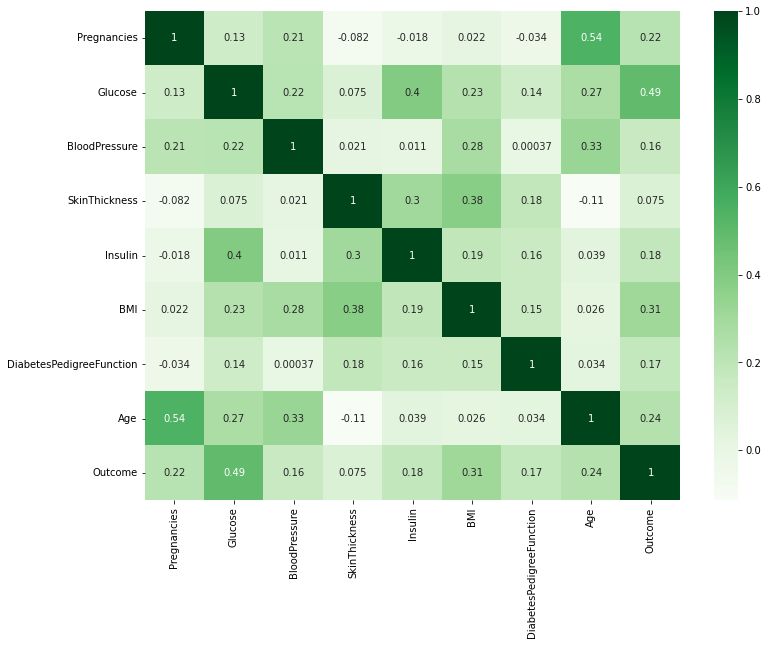

In [31]:
# Se genera gráfico de tipo correlacional
plt.figure(figsize=(12,9))
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)
plt.show()

Observando la gráfica, aparte de la correlación donde las columnas se comparan consigo mismas, solo se rescatan un par correlaciones. Entre la un comportamiento medio, las columnas de Age y Pregnancies, y por debajo levemente del valor medio sugerido por la teoría están las columnas Glucose y Outcome.

Esto último podría ser útil y lo analizaremos para toma de decisiones con estos datos.

## 🖌  *1er Gráfico*

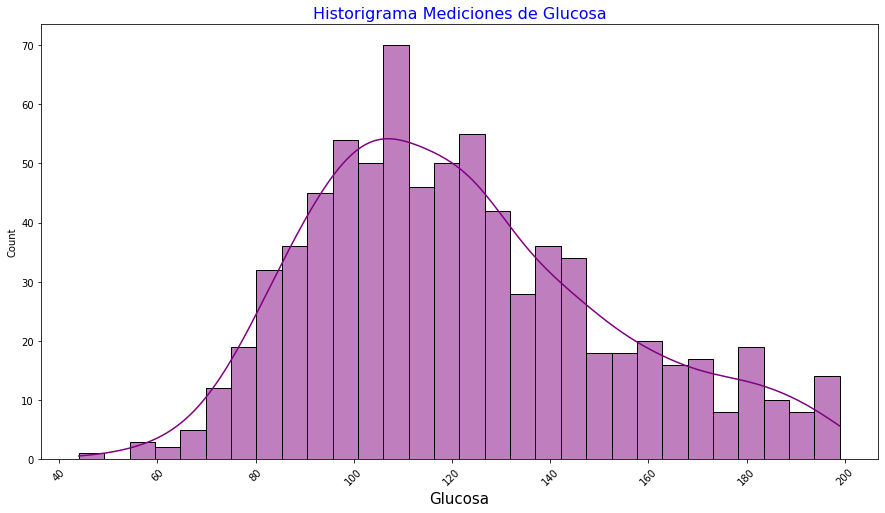

In [32]:
# Se crea historigrama de la columna Glucose
fig, ax = plt.subplots(figsize = (15, 8))
sns.histplot(data = df['Glucose'], bins = 30, edgecolor='black', kde = True, color='purple')
plt.title('Historigrama Mediciones de Glucosa', fontsize=16, color='b')
plt.xlabel("Glucosa", fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

## **Conclusión 1er Gráfico**

Con el gráfico anterior podemos visualizar que las mediciones de glucosa que registran una mayor cantidad es por valor de 110 mg/dL en cuanto a la concentración de glucosa en plasma. Seguida de un segundo valor importante de 130 mg/dL.

El agrupamiento con mayor presencia que podemos visualizar se da entre las mediciones de 80 mg/dL, que es cuando empieza a tomar fuerza la frecuencia de cantidad hasta los 130 mg/dL, que es donde ya la variación en cuanto cantidad de personas empieza a disminuir. Allí donde vemos que baja la cantidad de mediciones en las personas, aumenta el nivel de glucosa de estas, más específicamente las pertenecientes a la frecuencia al final del gráfico.

---

## 🖌  *2do Gráfico*

Para la segunda visualización me gustaría tener presente la correlación entre las mediciones de Glucosa y el que una persona tenga Diabetes o no. Por ello generaré un filtro que me permita visualizar en un Dataframe desde que valor de Glucosa empiezan aparecer casos con positivo para Diabetes.

In [33]:
# Creo filtro para las Columnas Outcome y Glucose que cumplan la condición que busco para luego plasmarlo en un DataFrame
Glucose_Outcome_Filter = df[df.Outcome.isin([1]) & df.Glucose].sort_values('Glucose', ascending = True)
Glucose_Outcome_Filter.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,3,78.0,50.0,32,88.000000,31.0,0.248,26,1
659,3,80.0,82.0,31,70.000000,34.2,1.292,27,1
510,12,84.0,72.0,31,79.799479,29.7,0.297,46,1
218,5,85.0,74.0,22,79.799479,29.0,1.224,32,1
125,1,88.0,30.0,42,99.000000,55.0,0.496,26,1
38,2,90.0,68.0,42,79.799479,38.2,0.503,27,1
542,10,90.0,85.0,32,79.799479,34.9,0.825,56,1
254,12,92.0,62.0,7,258.000000,27.6,0.926,44,1
709,2,93.0,64.0,32,160.000000,38.0,0.674,23,1
400,4,95.0,64.0,0,79.799479,32.0,0.161,31,1


In [34]:
# Reviso cuáles son los últimos 10 valores que aparecen en el DataFrame relacionado con el anterior filtro
Glucose_Outcome_Filter.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
498,7,195.0,70.0,33,145.000000,25.1,0.163,55,1
675,6,195.0,70.0,0,79.799479,30.9,0.328,31,1
206,8,196.0,76.0,29,280.000000,37.5,0.605,57,1
22,7,196.0,90.0,0,79.799479,39.8,0.451,41,1
359,1,196.0,76.0,36,249.000000,36.5,0.875,29,1
8,2,197.0,70.0,45,543.000000,30.5,0.158,53,1
579,2,197.0,70.0,99,79.799479,34.7,0.575,62,1
408,8,197.0,74.0,0,79.799479,25.9,1.191,39,1
561,0,198.0,66.0,32,274.000000,41.3,0.502,28,1
661,1,199.0,76.0,43,79.799479,42.9,1.394,22,1


In [35]:
# En el filtro inicial Glucose_Outcome_Filter pude identificar que las personas empiezan a registrar Diabetes a partir de medidas de glucosa igual o superiores a 78 mg/dL
# Conociendo dicho dato ahora quiero graficar el top20 de Valores que registran mayor número de personas por encima de ese punto origen
Glucose_filter = df['Glucose'] >= 78
Top20GF = df.loc[Glucose_filter, :].groupby(['Glucose'])['Outcome'].sum().sort_values(ascending = False).head(20)
Top20GF

Glucose
125.0    7
115.0    6
129.0    6
128.0    6
158.0    6
181.0    5
109.0    5
124.0    5
146.0    5
173.0    5
162.0    5
136.0    4
187.0    4
102.0    4
168.0    4
134.0    4
112.0    4
145.0    4
144.0    4
180.0    4
Name: Outcome, dtype: int64

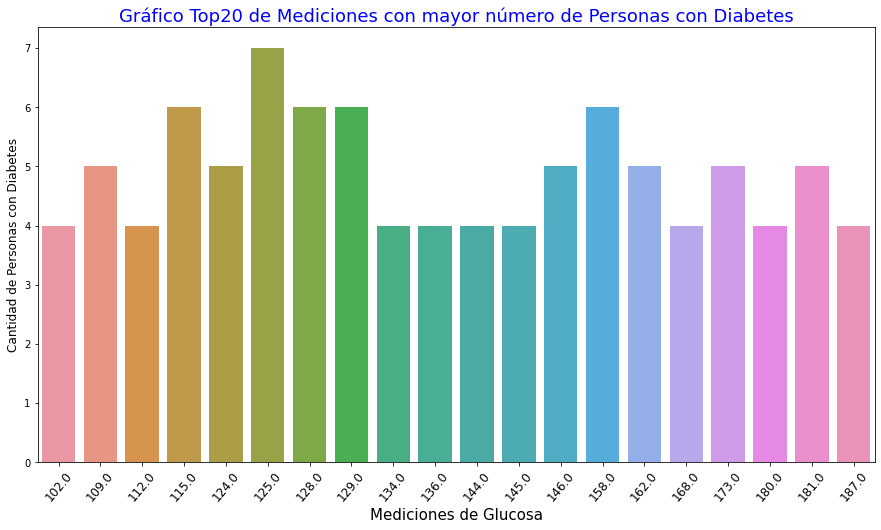

In [36]:
# Generamos un gráfico para hacer seguimiento visual a los datos trabajados en este análisis
fig, ax = plt.subplots(figsize = (15, 8))
sns.barplot(x = Top20GF.index, y = Top20GF.values);
plt.title('Gráfico Top20 de Mediciones con mayor número de Personas con Diabetes', size = 18, c = 'b')
plt.xticks(rotation = 50, size = 12);
plt.xlabel("Mediciones de Glucosa", size = 15)
plt.ylabel("Cantidad de Personas con Diabetes", size = 12)
plt.show()

## **Conclusión 2do Gráfico**

Como vemos en el gráfico, la medida de glucosa con personas con Diabetes que representa mayoría es de 125 
mg/dL, seguida por valores de 115, 128, 129 y 158 mg/dL.

Recordemos que no necesariamente las personas con Diabetes que pertenecen a una mayor cantidad de mediciones en particular sean las que tienen los niveles más alto de medición. Pues cuando realizamos nuestro filtro para analizar vimos valores muy altos en unas pocas personas de 195 a 199 mg/dL.

También pudimos identificar que el punto de medición donde las personas empiezan a estar diagnosticadas con Diabetes es de 78 mg/dL.




---






##⭐*Creación de un modelo para predecir si un paciente tiene (1) o no tiene (0) diabetes*

**Definir la característica (X) y objetivo (y).**

In [37]:
# Usando el formato para ML procedemos a definir el objetivo y, que este caso sabemos que es nuestra columna Outcome, junto a las demás características que representarian X
y = df['Outcome']
X = df.drop(columns=['Outcome'])

**Se realiza un train test split a los datos**

In [38]:
# Realizamos un train test split a los datos para prepararlos para el aprendizaje automático
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

**Creamos el selector de tipo numérico para nuestras columnas dado que no tenemos caracteristicas categoricas u ordinales**

In [39]:
# Procedemos a instanciar el selector de Columnas
num_selector = make_column_selector(dtype_include='number')

In [40]:
# Procedo a imprimir las columns correspondientes
num_columns = num_selector(X_train)
print('Las columnas numéricas son', num_columns)

Las columnas numéricas son ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


**Utilizare pipelines para Escalar las columnas numéricas**

In [41]:
# Procedemos a instanciar el transformador
# Scaler para los datos numéricos
scaler = StandardScaler()

In [42]:
# Generamos el pipeline para las características numéricas
numeric_pipe = make_pipeline(scaler)
numeric_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

**Todos los datos de preprocesamiento deben estar contenidos en un único objeto de preprocesamiento. En este caso en una única tupla que estaría asociada al Pipeline que creamos para las caracteristicas numéricas**

In [43]:
# Procedemos a instanciar el Transformador de Columna
# Creo la Tupla para el Column Transformer donde se relaciona el respectivo pipeline con el selector de tipo de dato numérico
number_tuple = (numeric_pipe, num_selector)

# Asociamos el ColumnTransformer a un preprocesador
preprocessor = make_column_transformer(number_tuple)

In [44]:
# Ajustamos el objeto de preprocesamiento y validamos que solo encajeremos el Transformador de Columna a los datos de entranamiento de nuestro dataset
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9495687520>)])

In [45]:
# Ya teniendo validado que el método fit funciono con el transformador agrupado dentro del ColumnTransformer
# Procedemos a usar este mismo para transformar los datos de entrenamiento y de prueba
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

**Concatenar todas las características de vuelta a un DataFrame**

In [46]:
# Mostramos los resultados, verificamos si hay valores faltantes, al igual que los datos se hayan escalado
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (576, 8)




array([[ 2.80346794,  0.24258793, -0.25110513, ...,  1.10366684,
         0.29608546,  0.96352088],
       [ 0.07832678,  0.24258793,  1.14476384, ...,  0.40523314,
        -0.70087555, -0.86295593],
       [-0.22446668, -2.01997244,  0.81427371, ...,  0.30337823,
        -0.66548048,  1.13747105],
       ...,
       [ 1.89508755, -0.68905457,  1.14476384, ...,  1.93305686,
         1.96850229,  0.44167036],
       [-1.13284707,  0.64186329, -0.25110513, ...,  1.46743439,
        -0.77756486, -0.34110542],
       [-1.13284707,  0.10949615,  1.97098917, ..., -1.42815531,
        -0.6094383 , -1.03690611]])

In [47]:
# Procedemos a cambiar dicha transformación hacia un DataFrame de Pandas para que sea fácil de ver e interpretar.
X_train_df = pd.DataFrame(X_train_processed)
X_train_df.head(10)

,0,1,2,3,4,5,6,7
0,2.803468,0.242588,-0.251105,0.616770,-0.410641,1.103667,0.296085,0.963521
1,0.078327,0.242588,1.144764,-0.032106,1.602319,0.405233,-0.700876,-0.862956
2,-0.224467,-2.019972,0.814274,0.486995,-0.410641,0.303378,-0.665480,1.137471
3,-0.527260,-1.354514,-0.011952,-0.356544,-0.450852,-0.322302,0.231195,-0.689006
4,-1.132847,-0.655782,0.235916,0.162557,-0.410641,-0.046919,0.304934,-1.036906
5,-0.224467,-0.755600,-1.499157,-0.096993,-0.345018,-0.977084,-0.927994,-0.775981
6,-1.132847,-0.489417,-0.838177,0.616770,-0.472019,0.623494,0.850608,-0.689006
7,-0.224467,1.606779,-0.672932,1.070984,1.126068,0.317929,-0.332177,-0.254130
8,2.197881,-1.221422,0.153293,-1.329858,-0.410641,-0.322302,-0.497354,0.180745
9,-1.132847,-0.655782,0.483784,1.265647,-0.302685,0.317929,-0.680228,-0.775981


In [48]:
# Visualizamos finalmente luego de la transformación como quedaron los datos de entrenamiento y al igual que tipo de dato por columna
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       576 non-null    float64
 1   1       576 non-null    float64
 2   2       576 non-null    float64
 3   3       576 non-null    float64
 4   4       576 non-null    float64
 5   5       576 non-null    float64
 6   6       576 non-null    float64
 7   7       576 non-null    float64
dtypes: float64(8)
memory usage: 36.1 KB




---



## 🧑  *Modelo Regresión Lineal*


**Importamos la libreria y Procedemos a instanciar el modelo**



In [49]:
# Importamos libreria e instanciamos el modelo en una variable
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

**Ajustamos el modelo a los datos de entrenamiento**

In [50]:
# Generamos el ajuste para que el modelo aprenda sobre la relación entre las características y el objetivo.
reg.fit(X_train_processed, y_train)

LinearRegression()

**Evaluamos el modelo de rendimiento en el conjunto de entrenamiento y de prueba usando la puntuación R^2**

In [51]:
# Procedemos a evaluar mediante el coeficiente de determinación (R^2) los conjuntos de entrenamiento y de prueba
regl_train_score = reg.score(X_train_processed, y_train)
regl_test_score = reg.score(X_test_processed, y_test)
print(f"El Train Score para este modelo es de: {regl_train_score}")
print(f"El Test Score para este modelo es de: {regl_test_score}")

El Train Score para este modelo es de: 0.3411842786194794
El Test Score para este modelo es de: 0.2360399427999138


**Análisis:**

El valor R^2 en nuestro conjunto de entrenamiento es 0,341, y el valor R^2 en nuestro conjunto de prueba es 0,236. Por lo que podríamos definir que el modelo pudiera estar sobre ajustado dado de que nos dieron en ambas evaluaciones unos valores muy bajos, al igual que vemos que quizá el modelo pueda funcionar mejor en los datos de entrenamiento que en los datos de prueba.

**Procedemos a obtener los valores de predicciones del modelo**

In [52]:
# Obteniendo las predicciones del conjunto de entrenamiento y del conjunto de prueba
train_preds = reg.predict(X_train_processed)
test_preds = reg.predict(X_test_processed)

**Importamos las librerias para usar las métricas requeridas para evaluar el modelo de regresión**

In [53]:
# Importando librerias para calcular el error absoluto medio (EAM), el error cuadrático medio (ECM) y la raíz del error cuadrático medio (RECM)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

**Inicialmente obtenemos la información métrica relacionada al Coeficiente de determinación (r^2)**

In [54]:
# Obtenemos el valor que se le asignara a las variables r2 de train y test
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

# R^2 tiene dos entradas r2_score(valores_reales, valores_de_predicción)
print("Valor de métrica R2 para conjunto de entrenamiento:", r2_train)
print("Valor de métrica R2 para conjunto de prueba:", r2_test)

Valor de métrica R2 para conjunto de entrenamiento: 0.3411842786194794
Valor de métrica R2 para conjunto de prueba: 0.2360399427999138


**Obtenemos el valor del Error absoluto medio (EAM)**




In [55]:
# Utilizamos el MAE para evaluar el error de predicción
mae_train = mean_absolute_error(y_train, train_preds)
mae_test = mean_absolute_error(y_test, test_preds)
print(f'Valor de métrica MAE para el conjunto de entrenamiento:', mae_train)
print(f'Valor de métrica MAE para el conjunto de prueba:', mae_test)

Valor de métrica MAE para el conjunto de entrenamiento: 0.3155035392709872
Valor de métrica MAE para el conjunto de prueba: 0.34542226329047193


**Obtenemos el valor del Error Cuadrático Medio (ECM)**




In [56]:
# Utilizamos el MSE para evaluar el error de predicción
mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)
print("Valor de métrica MSE para el conjunto de entrenamiento:", mse_train)
print("Valor de métrica MSE para el conjunto de prueba:", mse_test)

Valor de métrica MSE para el conjunto de entrenamiento: 0.14897500682728948
Valor de métrica MSE para el conjunto de prueba: 0.17588240574699252


**Obtenemos el valor de la Raíz del error cuadrático medio (RECM)**


In [57]:
# Utilizamos el RMSE Utilizado para evaluar el error de predicción
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print("Valor de métrica RMSE para el conjunto de entrenamiento:", rmse_train)
print("Valor de métrica RMSE para el conjunto de prueba:", rmse_test)

Valor de métrica RMSE para el conjunto de entrenamiento: 0.385972805813168
Valor de métrica RMSE para el conjunto de prueba: 0.4193833636984096


In [58]:
# Analizamos las prediciones del conjunto de entrenamiento frente al objetivo de entrenamiento
print(train_preds.round(2))
print(np.array(y_train))

[ 0.7   0.31  0.01 -0.01  0.11  0.04  0.28  0.66  0.15  0.13  0.35  0.31
  0.62  0.09  0.1   0.3   0.9   0.62  0.33  0.24  0.2   0.14  0.67  0.12
  0.7   0.32  0.39  0.87  0.61  0.11  0.07  0.22  0.03  0.53  0.24  0.31
  0.33  0.24  0.1  -0.04  0.22  0.47  0.37  0.44  0.07  0.31  0.37  0.49
  0.14 -0.02  0.51  0.13  0.21  0.35  0.75  0.1   0.37  0.26  0.19  0.17
  0.63  0.    0.24  0.64  0.18  0.42  0.09  0.03  0.54  0.46  0.15 -0.11
  0.22  0.09  0.39  0.27 -0.04  0.33  0.08  0.22  0.67  0.62  0.38  0.17
  0.07  0.62  0.17  0.2   0.31  0.74  0.84  0.99  0.16  0.34  0.84  0.7
 -0.07  0.78  0.15  0.21  0.79  0.25  0.43  0.16  0.21  0.79  0.21  0.33
  0.25  0.59  0.74 -0.08  0.05 -0.24  0.25  0.37  0.07  0.48  0.11  1.03
  0.76 -0.14  0.37  0.11  0.75  0.11 -0.05  0.08  0.45  0.39  0.95  0.27
  0.24  0.44  0.23  0.26  0.51  0.16  0.26  0.07 -0.09  0.4   0.22  0.06
  0.91  0.68  0.15  0.11  0.5   0.16  0.32  0.67  0.68  1.04 -0.1   0.12
  0.06  0.35  0.22  0.43  0.9   0.82  0.36  0.13  0.

In [59]:
# Analizamos las prediciones del conjunto de prueba frente al objetivo de prueba
print(test_preds.round(2))
print(np.array(y_test))

[ 0.3   0.23  0.15  0.2   0.5   0.43 -0.24  0.41  0.56  0.72  0.29  0.9
  0.43  0.31  0.04  0.39  0.13  0.04  0.72  0.55  0.26  0.05  0.46  0.1
  0.53  0.88  0.14 -0.07  0.3   0.13  0.88  0.82  0.77  0.64  0.54  0.64
  1.04  0.26  0.49  0.51  0.03  0.55  0.5   0.35 -0.11  0.53  0.52  0.23
  0.37  1.03 -0.03  0.62  0.74  0.32  0.17 -0.07  0.74 -0.01  0.41  0.74
  0.67  0.37  0.3   0.24  0.05  0.57 -0.05  0.69 -0.06  0.7   0.63  0.02
  0.21  0.14  0.1   0.46  0.2   0.14  0.18  0.3   0.64  0.17 -0.01  0.42
  0.31  0.84  0.86  0.35  0.13  0.08  0.02  0.27 -0.07  0.37  0.49  0.58
  0.38  0.12  0.63  0.03  0.69  0.    0.69  0.53  0.62  0.28  0.33  0.7
  0.1   0.45  0.08  0.44  0.22  0.72  0.23  0.35  0.69  0.27  0.01  0.39
  0.03  0.29  0.28  0.03  0.37  0.41  0.35  0.81  0.91  0.71  0.69  0.8
  0.09  0.46  0.78  0.14  0.22  0.83  0.74 -0.26  0.1  -0.06  0.3   0.44
  0.14  0.27  0.11 -0.19  0.41  0.73  0.08  0.44  0.33  0.18  0.01  0.41
  0.38  0.63  0.66  0.21  0.38  0.64  0.22 -0.22  0.13 

## 🎯**Conclusión Modelo Regresión Lineal**


Luego de evaluar el modelo de rendimiento usando la puntuación R^2 y las demás métricas de regresión, no obtuvimos un buen comportamiento. Aquí algunas de las conclusiones analizadas:

*   El coeficiente de determinación para ambos conjuntos estaba más orientado a 0, con un nivel bajo de rendimiento. El de entrenamiento tenía mejor respuesta que el conjunto de prueba. Por lo que podríamos definir que el modelo pudiera estar subajustado dado de que nos dieron en ambas evaluaciones unos valores muy bajos por debajo del 35% de la varianza de y entre x.
*   Al usar el MAE el índice en el conjunto de pruebas aumento, lo que nos indica que el modelo tuvo un peor comportamiento en hacer predicciones en los datos de prueba ocultos.
* En la métrica MSE mejoro la medición del modelo al pasar de los valores anterior a unos valores de 0.14 y 0.17 respectivamente en cada conjunto, aún mostrando un mejor comportamiento el conjunto de entrenamiento sobre el de pruebas.
* Finalmente, con el RMSE se hizo evidente que los errores grandes incrementaron al quedar el rendimiento en 0.38 de entrenamiento y 0.41 de pruebas.

Todo lo anterior nos lleva a inferir que esta varianza puede darse a que quizás se requieren más datos para el data set en miras de obtener un mejor comportamiento y que tambien la poca correlación entre columnas no aportara a manejar un mejor sesgo.




---




## 🌲 *Modelo Árboles de decisión*


**Importamos la libreria y Procedemos a instanciar el modelo**

In [60]:
# Importamos libreria e instanciamos el modelo en una variable
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=42)

Ajustamos el modelo usando los datos de entrenamiento

In [61]:
# El modelo está aprendiendo la relación entre las características (X) y el objetivo (y).
dec_tree_reg.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

**Procedemos a predecir los valores objetivos para el conjunto de entrenamiento y de prueba**

In [62]:
# Obteniendo las predicciones del conjunto de entrenamiento y del conjunto de prueba
train_preds_dtr = dec_tree_reg.predict(X_train_processed)
test_preds_dtr = dec_tree_reg.predict(X_test_processed)

**Evaluamos el modelo con las instancias generadas**

In [63]:
r2_tree_train_score = dec_tree_reg.score(X_train_processed, y_train)
r2_tree_test_score = dec_tree_reg.score(X_test_processed, y_test)
print("La métrica de evaluación para el conjunto de entrenamiento es: ", r2_tree_train_score)
print("\n")
print("La métrica de evaluación para el conjunto de prueba es: ", r2_tree_test_score)

La métrica de evaluación para el conjunto de entrenamiento es:  1.0


La métrica de evaluación para el conjunto de prueba es:  -0.3799929303640863


**Explorando ajuste del modelo**

In [64]:
# Ejecutamos el nombre del modelo instanciado junto a los parámetros a instanciar
dec_tree_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

**Identificamos la profundidad del arbol por defecto y sus nodos hojas**

In [65]:
# Ejecutamos funciones para la búsqueda de valores
depth_tree = dec_tree_reg.get_depth()
n_leaves_tree = dec_tree_reg.get_n_leaves()
print("La profundidad del árbol por defecto es: ", depth_tree)
print("La cantidad de nodos hojas del árbol por defecto es: ", n_leaves_tree)

La profundidad del árbol por defecto es:  13
La cantidad de nodos hojas del árbol por defecto es:  97


**Tratando de encontrar el max_depth óptimo (ajuste de hiperparámetro)**

In [66]:
# Vayamos al extremo y fijemos nuestra profundidad máxima en 2
dec_tree_reg_2 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
dec_tree_reg_2.fit(X_train_processed, y_train)
train_2_score = dec_tree_reg_2.score(X_train_processed, y_train)
test_2_score = dec_tree_reg_2.score(X_test_processed, y_test)
print("La métrica de evaluación para el conjunto de entrenamiento es: ", train_2_score)
print("\n")
print("La métrica de evaluación para el conjunto de prueba es: ", test_2_score)

La métrica de evaluación para el conjunto de entrenamiento es:  0.2738896205042054


La métrica de evaluación para el conjunto de prueba es:  0.14549324761975357


Con las anteriores puntuaciones podemos identificar que el modelo esta subajustado al tener un rendimiento por debajo del 28% tanto para el conjunto de entrenamiento como de pruebas. Tambien notamos una varianza con sobreajuste de los datos de entrenamiento ya que el rendimiento de entrenamiento esta muy alejado del rendimiento de prueba, un 0.27 del primero contra un 0.14 del otro.

**Ajustamos nuevamente el max_depth óptimo a la mitad de profundidad por defecto**

In [67]:
# Ajustamos el hiperparámetro a 7
dec_tree_reg_7 = DecisionTreeRegressor(max_depth = 7, random_state = 42)
dec_tree_reg_7.fit(X_train_processed, y_train)
train_7_score = dec_tree_reg_7.score(X_train_processed, y_train)
test_7_score = dec_tree_reg_7.score(X_test_processed, y_test)
print("La métrica de evaluación para el conjunto de entrenamiento es: ", train_7_score)
print("\n")
print("La métrica de evaluación para el conjunto de prueba es: ", test_7_score)

La métrica de evaluación para el conjunto de entrenamiento es:  0.7207645324089615


La métrica de evaluación para el conjunto de prueba es:  -0.19923351445706428


En esta ocasión el conjunto de entrenamiento mejoro su valor de rendimiento pero el de pruebas desmejoro en gran medida.

**Aplicamos función de GridSearch para lograr obtener el mejor max_depth óptimo**

In [68]:
# Lista de valores a probar para max_depth:
max_depth_range = list(range(2, 13)) # will try every value between 2 and 36
# Lista para almacenar la puntuación para cada valor de max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree_reg = DecisionTreeRegressor(max_depth = depth, random_state = 42)
    dec_tree_reg.fit(X_train_processed, y_train)
    score = dec_tree_reg.score(X_test_processed, y_test)
    r2.append(score)

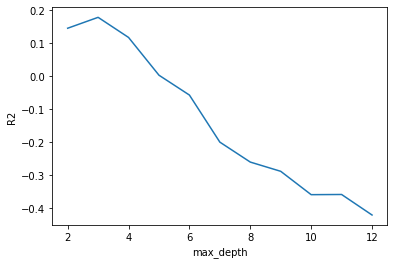

In [69]:
# Creamos gráfico para visualizar qué max_depth lleva a una puntuación R2 más alta
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

**Por la imagen anterior, parece que la mejor puntuación del modelo es cuando el parámetro max_depth es 3.**

In [70]:
# Ejecutamos el modelo con nuestro valor optimizado para max_depth
dec_tree_reg_3 = DecisionTreeRegressor(max_depth = 3, random_state = 42)
dec_tree_reg_3.fit(X_train_processed, y_train)
train_3_score = dec_tree_reg_3.score(X_train_processed, y_train)
test_3_score = dec_tree_reg_3.score(X_test_processed, y_test)
print("La métrica de evaluación para el conjunto de entrenamiento es: ", train_3_score)
print("\n")
print("La métrica de evaluación para el conjunto de prueba es: ", test_3_score)

La métrica de evaluación para el conjunto de entrenamiento es:  0.36170330217457725


La métrica de evaluación para el conjunto de prueba es:  0.17846647074131894


Aunque los valores de rendimiento mejoraron para ambos conjuntos, se sigue presentando valores no tan deseados para obtener un buen modelo predictivo con este tipo de análisis.

## 🎯**Conclusión Modelo Árboles de Decisión**


Luego de evaluar el modelo de Árboles de Decisión usando la puntuación R^2 con diferentes hiperpárametros. LLegamos a la siguiente conclusiones analizadas:

*   El coeficiente de determinación para ambos conjuntos estaba más orientado a 0, con un nivel bajo de rendimiento. El conjunto de entrenamiento siempre tuvo mejor respuesta a las variaciones respecto al conjunto de prueba.
* El conjunto de prueba en sus diversas métricas de evaluación a partir de un mayor número de nodos mostro valores negativos. Por lo que nos indica una correlación defectuosa casi que nula del conjunto y las caracteristicas en comparación a su objetivo.

Con lo anterior definimos que el modelo esta subajustado al tener un rendimiento por debajo del 28% tanto para el conjunto de entrenamiento como de pruebas. Tambien notamos un modelo de varianza baja con sobreajuste de los datos de entrenamiento ya que el rendimiento de entrenamiento estuvo muy alejado del rendimiento del de prueba. Incluso con valores negativos.

---

## 🥼  *Modelo Regresión Logistica*



**Importamos la libreria y Procedemos a instanciar el modelo**

In [71]:
# Importamos libreria e instanciamos el modelo en una variable
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C = 1000)

**Visualizamos la relación entre las columnas Glucose y Outcome (objetivo)**

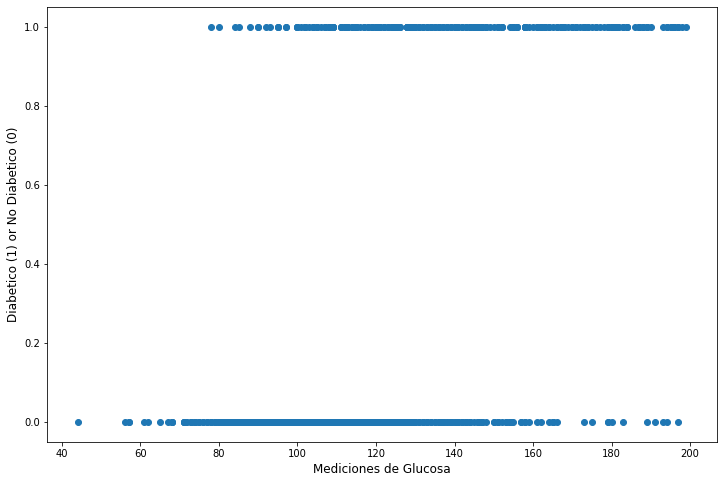

In [72]:
# Generamos un gráfico para hacer seguimiento visual a los datos trabajados en este análisis
fig, ax = plt.subplots(figsize = (12, 8))
plt.scatter(df['Glucose'], df['Outcome'])
plt.ylabel('Diabetico (1) or No Diabetico (0)', fontsize = 12)
plt.xlabel('Mediciones de Glucosa', fontsize = 12)
plt.show()

Como lo vimos en una oportunidad anterior con el análisis de uno de los gráficos que usamos para la exploración de datos. Pudimos evidenciar que las personas con diagnóstico de Diabetes (Outcome = 1) se relacionaban a que si su medida de Glucosa era igual o superior a 78, recibían dicha asignación.

**Configuramos modelado para probar la relación gráfica entre las columnas con mejor correlación**

In [73]:
# Asignamos la caracteristica en este caso Glucosa y el vector objetivo que seria Outcome
X = df[['Glucose']]
y = df['Outcome']

# Generamos un Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [74]:
# Instantiate Scaler
scaler = StandardScaler()

# Creamos Pipeline para añadir Escalador y la instancia del modelo
logreg_pipe = make_pipeline(scaler, logreg)

# Ajustado el modelo con los datos, El modelo aprende entre la relación de y las caracteristicas X
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1000))])

In [75]:
# Este codigo solo es usado para visualizar las predicciones
example_df = pd.DataFrame(data = {'Glucose': X_test['Glucose'], 'Outcome': y_test})
example_df['logistic_preds'] = pd.DataFrame(logreg_pipe.predict_proba(X_test)).loc[:, 1].values
example_df = example_df.sort_values(['logistic_preds'])

 **Graficamos la regresión logística**

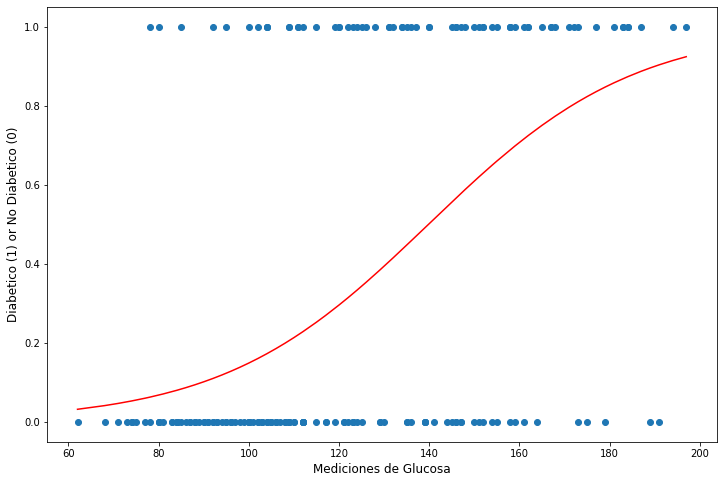

In [76]:
# Generamos un gráfico para hacer seguimiento visual a los datos trabajados en este análisis
fig, ax = plt.subplots(figsize = (12, 8))
plt.scatter(X_test['Glucose'], y_test)
plt.plot(example_df['Glucose'], example_df['logistic_preds'].values, color='red')
plt.ylabel('Diabetico (1) or No Diabetico (0)', fontsize = 12)
plt.xlabel('Mediciones de Glucosa', fontsize = 12)
plt.show()

De acuerdo con esto, cualquier valor de predicción (rojo) mayor a 60 (que corresponde al valor cerca de las mediciones de Glucosa), nos ayuda a predecir que una persona puede pertenecer a tipo Outcome 1 (osea tiene Diabetes), sino se marca en el gragico predecimos una clase tipo Outcome 0 (No diabetes).

<br>

Con esto podemos escalar los datos para usarlos en el modelo de regresión. Las probabilidades previstas están ahora más calibradas por lo que ahora se puede predecir un 0 o un 1 dependiendo de los puntos de Mediciones de Glucosa.

**Aplicando Modelo de Regresión logística**

In [77]:
# Definimos objetivo y caracteristicas X
X = df.drop(columns=['Outcome'])
y = df['Outcome']
 
# Creamos nuevamente el Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Hacemos una instancia del modelo con los parametros por defecto
logreg = LogisticRegression()

# Instanciamos el por que el escalamiento de Standard Scaler es requirido para la regresión Logistica
scaler = StandardScaler()

# Ponemos el escalanmiento y el modelo dentro de un Pipeline
logreg_pipe = make_pipeline(scaler, logreg)

# Entrenamos el modelo en los datos y para que aprenda de los mismos
# El modelo esta aprendiendo entre la relación de X y el objetivo Y
logreg_pipe.fit(X_train, y_train)
print("El Train Score para este modelo es de: ", logreg_pipe.score(X_train, y_train))
print("El Test Score para este modelo es de: ", logreg_pipe.score(X_test, y_test))

El Train Score para este modelo es de:  0.7829861111111112
El Test Score para este modelo es de:  0.7395833333333334


**Afinación o regularización de L1:**

{0.0001: 0.640625,
 0.001: 0.640625,
 0.01: 0.7083333333333334,
 0.1: 0.7291666666666666,
 1: 0.7395833333333334,
 10: 0.7395833333333334,
 100: 0.7395833333333334,
 1000: 0.7395833333333334}

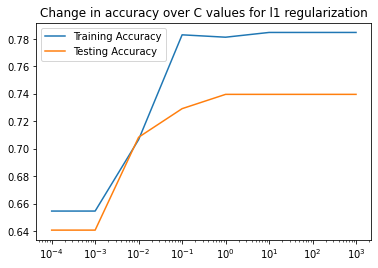

In [78]:
# Creamos una lista para los valores de C en la instancia regresión 
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

# Por medio de un ciclo iteramos con los valores de C en la lista
for c in c_values:
 
  # Instanciamos el modelo con cada valor de C y los ajustamos a los datos
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # Añadimos los valores del conjunto de entrenamiento y prueba a los valores de la lista
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))

# Dibujamos los cambios con el Accuracy cuando se cambia el valor de C en la instancia de regresión logistica 
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
# Configuramos en el X la escala logaritmica para mostrar los valores de C incluso en intervalos
ax.set_xscale('log')
# Imprimos el diccionario de los valores de C y los valores del Accuracy
{c:score for c, score in zip(c_values, test_scores)}

Con base en el gráfico podemos obtener una mejor exactitud del conjunto de prueba cuando C tiene un valor de 0.71 (10^-2) hasta llegar a un valor de 0.739 (10^0) que es donde ya se aplana la linea, que es el punto donde se obtiene una mejor varianza para este conjunto de datos.

**Afinación o regularización de L2:**

{0.0001: 0.703125,
 0.001: 0.703125,
 0.01: 0.71875,
 0.1: 0.734375,
 1: 0.7395833333333334,
 10: 0.7395833333333334,
 100: 0.7395833333333334,
 1000: 0.7395833333333334}

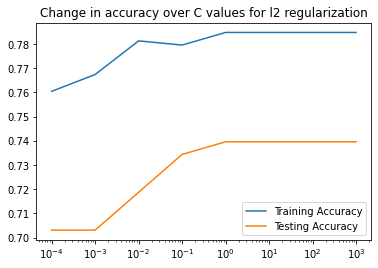

In [79]:
# Creamos una lista para los valores de C en la instancia regresión 
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

# Por medio de un ciclo iteramos con los valores de C en la lista
for c in c_values:

  # Instanciamos el modelo con cada valor de C y los ajustamos a los datos
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # Añadimos los valores del conjunto de entrenamiento y prueba a los valores de la lista
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
  
# Dibujamos los cambios con el Accuracy cuando se cambia el valor de C en la instancia de regresión logistica 
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()

# Configuramos en el X la escala logaritmica para mostrar los valores de C incluso en intervalos
ax.set_xscale('log')
# Imprimos el diccionario de los valores de C y los valores del Accuracy
{c:score for c, score in zip(c_values, test_scores)}

Vemos que con la regularización L2 la puntuación en C para el conjunto de entrenamiento mejora y las puntuaciones del conjunto de prueba se mantienen con la consistencia anterior, lo que nos indica un buen punto para indicar que la variación se mantiene solida.

Con este analisis que acabamos de hacer podemos afirmar que el mejor conjunto de hiperparámetro para nuestro modelo de regresión logística es solver=’liblinear’, penalty=’l2’ y C=0,1. Gracias al mejor correlacionamiento que se tiene con este tipo de afinación. Lo que nos permite consolidar un balance entre el sesgo y varianza para el desarrollo de este modelo en nuestro data set.



---



## 🏆 **Conclusión Final (Elección del Modelo final)**


Luego de probar tres modelos diferentes, en este caso el Modelo de Regresión Lineal, el Modelo Árboles de Decisión y el Modelo de Regresión Logistica.

**He elegido el Modelo de Regresión Logistica** 



*  Porque es el que me brindo mejor varianza alta frente al conjunto de datos de prueba.
*  Porque fue el modelo que me permitió identificar un equilibrio entre el sesgo y la varianza, muchísimo mejor que entre los demás modelos. 
* El modelo me permite tener más poder de predicción.
* El modelo me permite identificar una mejor correlación entre las dos columnas que más se orientan hacia el descubrimiento del objetivo del análisis.



In [80]:
print("La métrica de evaluación para el conjunto de entrenamiento con Modelo de Regresión Lineal es: ", r2_train.round(2)*100)
print("La métrica de evaluación para el conjunto de prueba con Modelo de Regresión Lineal es: ", r2_test.round(2)*100)
print("\n")
print("La métrica de evaluación para el conjunto de entrenamiento con Modelo de Árbol de regresión es: ", train_3_score.round(2)*100)
print("La métrica de evaluación para el conjunto de prueba con Modelo de Árbol de regresión es: ", test_3_score.round(2)*100)
print("\n")
print("La métrica de evaluación para conjunto de entrenamiento con Modelo de Regresión Logistica es: ", logreg_pipe.score(X_train, y_train).round(2)*100)
print("La métrica de evaluación para conjunto de prueba con Modelo de Regresión Logistica es: ", logreg_pipe.score(X_test, y_test).round(2)*100)

La métrica de evaluación para el conjunto de entrenamiento con Modelo de Regresión Lineal es:  34.0
La métrica de evaluación para el conjunto de prueba con Modelo de Regresión Lineal es:  24.0


La métrica de evaluación para el conjunto de entrenamiento con Modelo de Árbol de regresión es:  36.0
La métrica de evaluación para el conjunto de prueba con Modelo de Árbol de regresión es:  18.0


La métrica de evaluación para conjunto de entrenamiento con Modelo de Regresión Logistica es:  78.0
La métrica de evaluación para conjunto de prueba con Modelo de Regresión Logistica es:  74.0
